In [1]:
%matplotlib inline

In [2]:
import s2

In [3]:
latlng = s2.S2LatLng.FromDegrees(-30.043800, -51.140220)

In [4]:
cell = s2.S2CellId.FromLatLng(latlng)

In [5]:
cell.level()

30

In [6]:
cell.ToToken()

'951977d377e723ab'

In [7]:
parent = cell.parent()
print "Parent level:", parent.level()
print "Parent Id:", parent.id()
print "Parent Token:", parent.ToToken()
print "parent in cell:", cell.contains(parent)
print "cell in parent:", parent.contains(cell)

Parent level: 29
Parent Id: 10743750136202470316
Parent Token: 951977d377e723ac
parent in cell: False
cell in parent: True


In [13]:
import matplotlib.pyplot as plt

from s2 import *

from shapely.geometry import Polygon

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

Total Geometries: 374


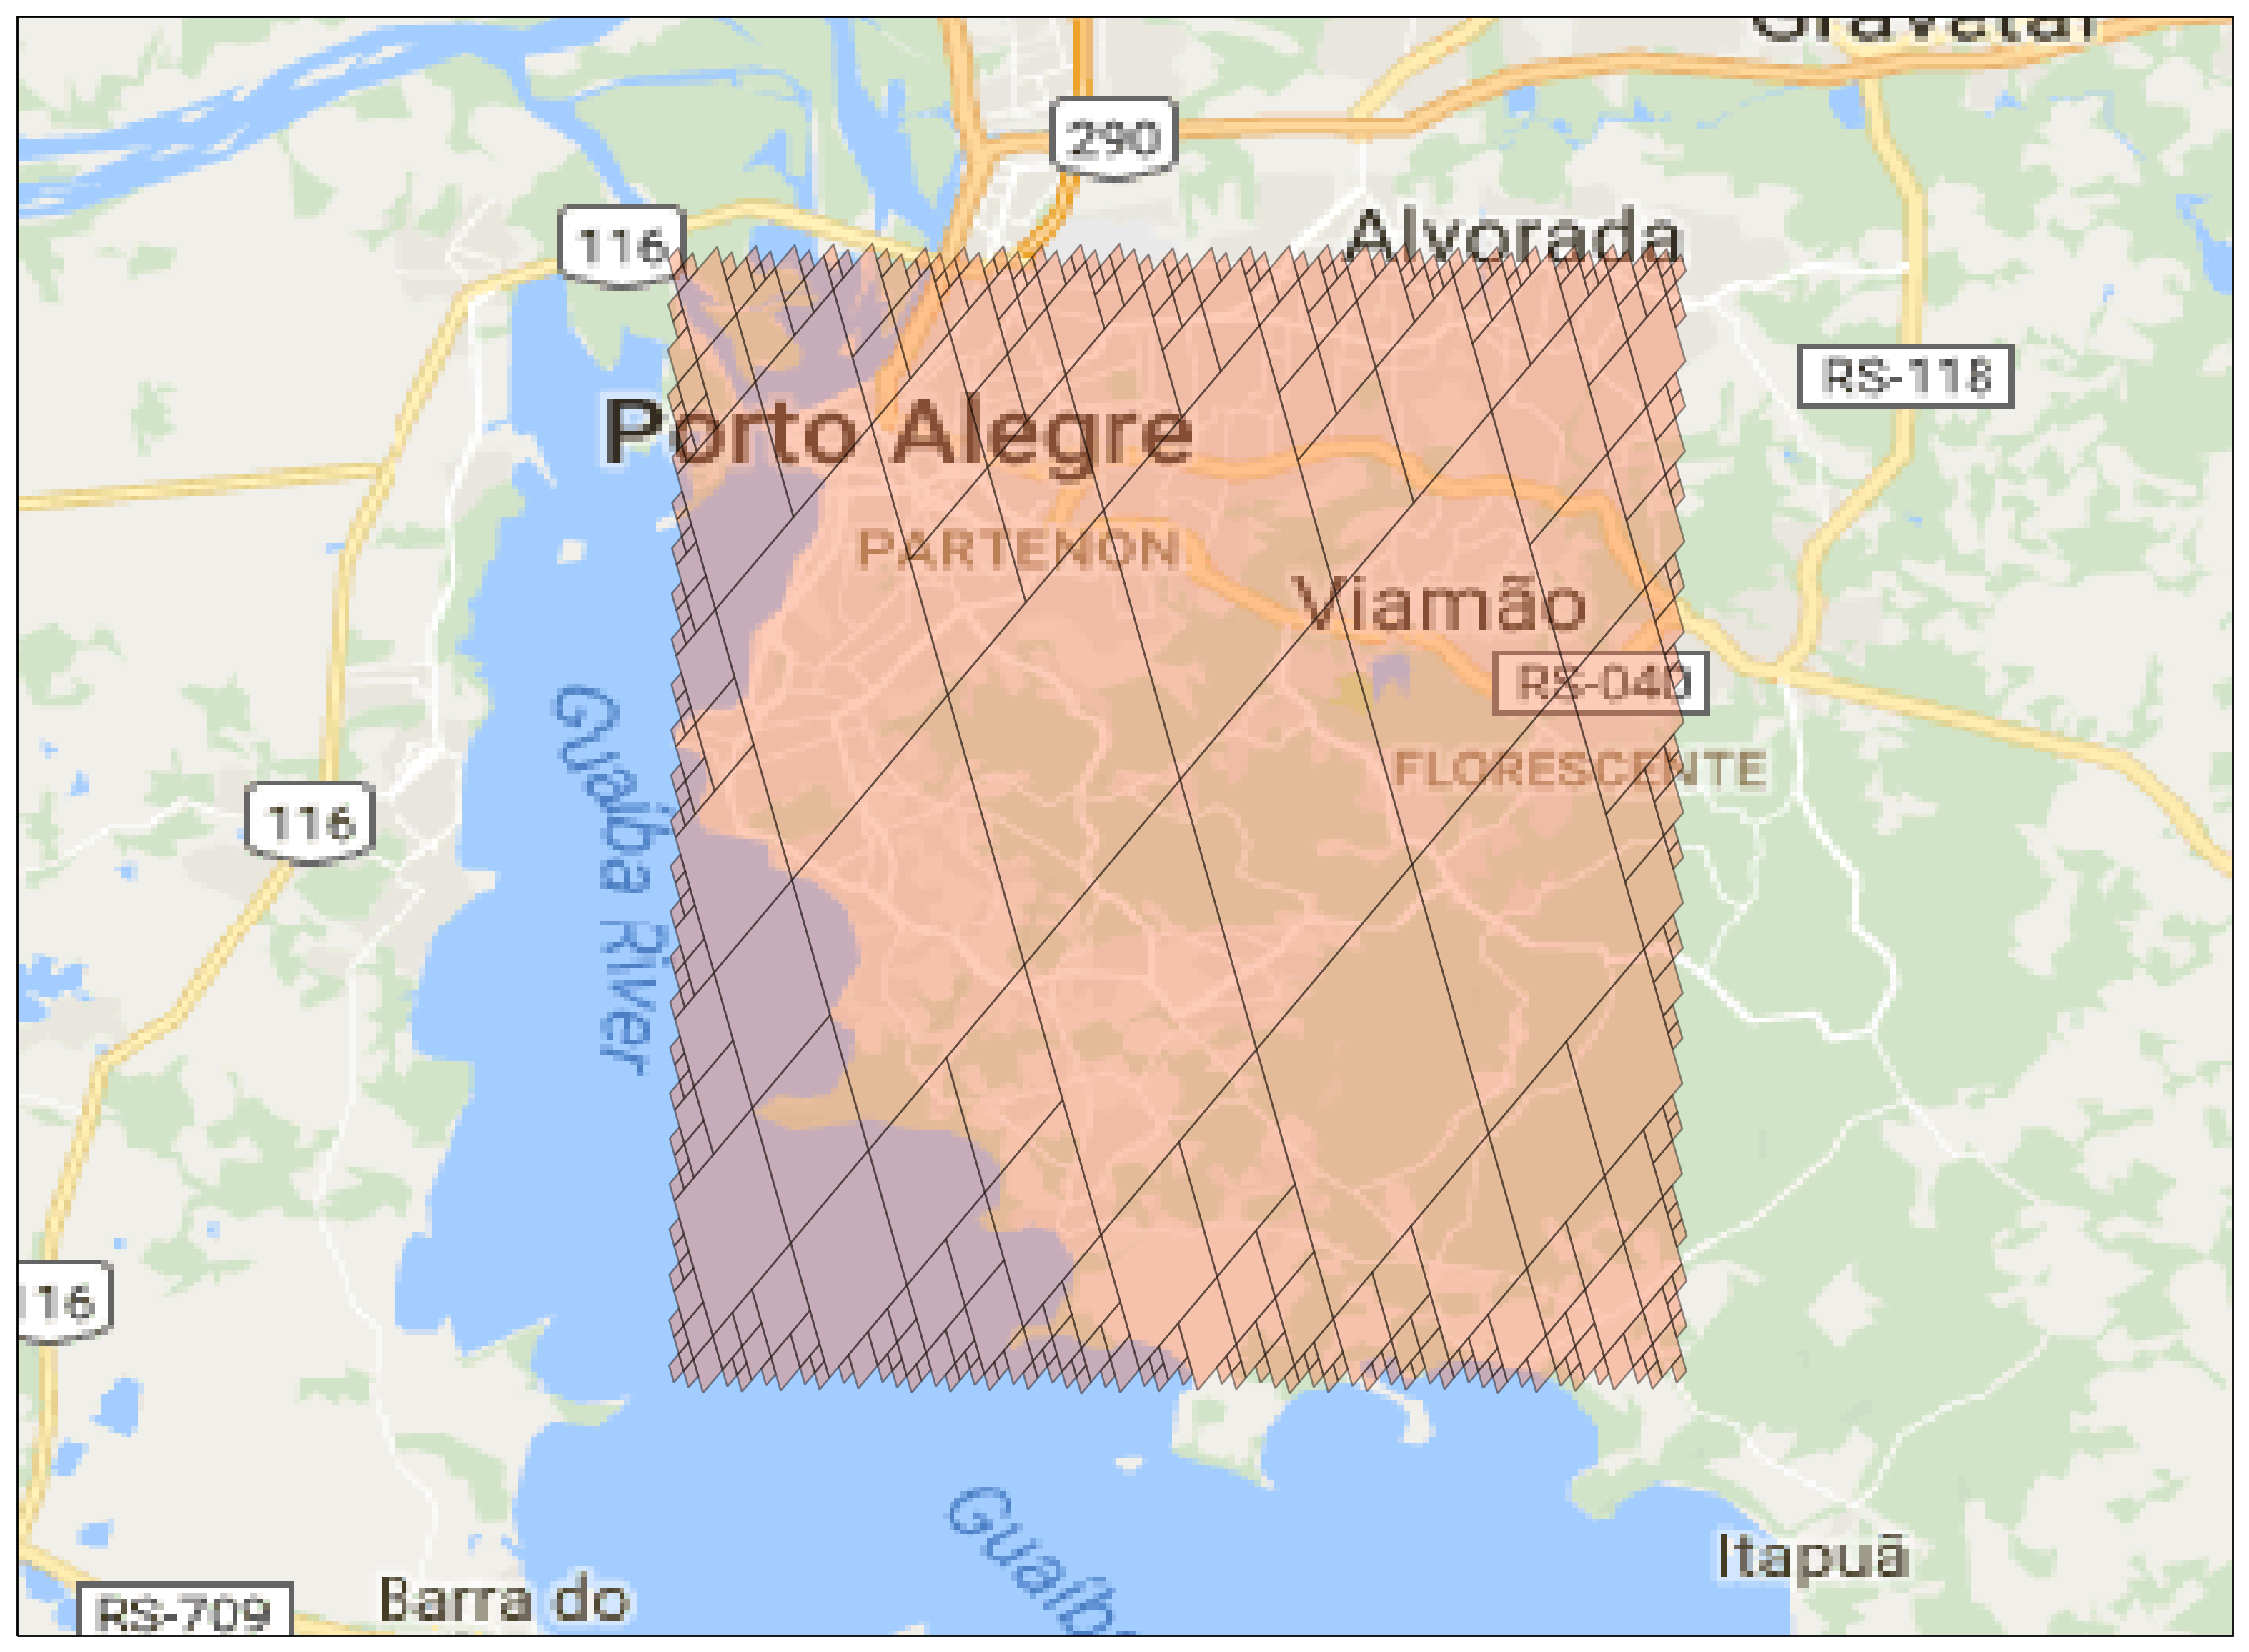

In [24]:
# proj = cimgt.MapQuestOSM()
# plt.figure(figsize=(20,20), dpi=200)
# ax = plt.axes(projection=proj.crs)
# ax.add_image(proj, 12)

proj = ccrs.PlateCarree()
plt.figure(figsize=(20,20), dpi=200)
ax = plt.axes(projection=proj)
#ax.stock_img() # with this instead of gtiles, it works
gg_tiles = cimgt.GoogleTiles()
ax.add_image(gg_tiles, 10)
ax.plot([1,2], [1,2])

ax.set_extent([-51.411886, -50.922470,
               -30.301314, -29.94364])
region_rect = S2LatLngRect(
    S2LatLng.FromDegrees(-51.264871, -30.241701),
    S2LatLng.FromDegrees(-51.04618, -30.000003))

coverer = S2RegionCoverer()
coverer.set_min_level(8)
coverer.set_max_level(15)
coverer.set_max_cells(500)
covering = coverer.GetCovering(region_rect)
geoms = []
for cellid in covering:
    new_cell = S2Cell(cellid)
    vertices = []
    for i in xrange(0, 4):
        vertex = new_cell.GetVertex(i)
        latlng = S2LatLng(vertex)
        vertices.append((latlng.lat().degrees(),
                         latlng.lng().degrees()))

    geo = Polygon(vertices)
    geoms.append(geo)

print "Total Geometries: {}".format(len(geoms))
    
ax.add_geometries(geoms, ccrs.PlateCarree(), facecolor='coral',
                  edgecolor='black', alpha=0.4)
plt.show()